In [34]:
import math
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage.util import img_as_ubyte

In [15]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

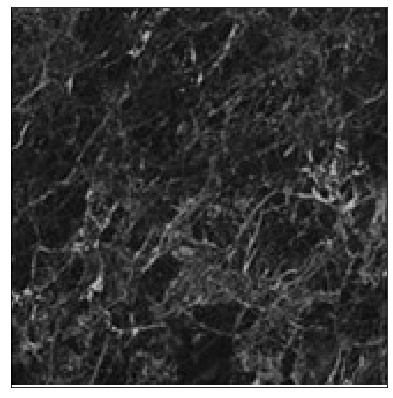

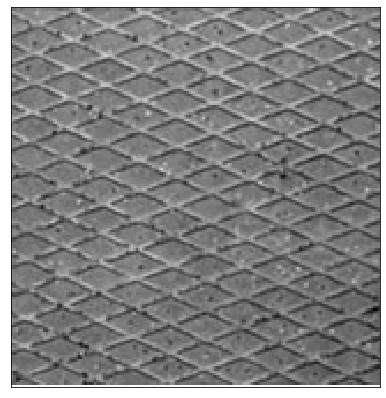

In [185]:
img_marmol = io.imread(fname="images/marmol.png",as_gray=True)
imshow(img_marmol)
img_metal = io.imread(fname="images/metal.png",as_gray=True)
imshow(img_metal)

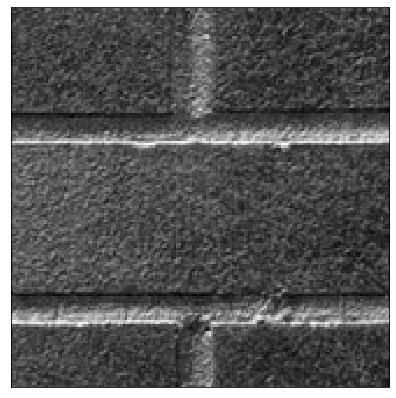

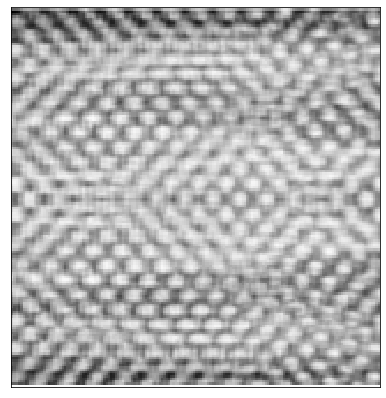

In [186]:
img_bloque = io.imread(fname="images/bloque.png",as_gray=True)
imshow(img_bloque)
img_waves = io.imread(fname="images/waves.png",as_gray=True)
imshow(img_waves)

In [76]:
image = np.array([ [0, 0, 1, 2],
                   [0, 1, 3, 2],
                   [0, 2, 3, 2],
                   [1, 2, 3, 0]], dtype=np.uint8)
result = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],levels=4)
print("Horizontal")
print(result[:, :, 0, 0])
print("Diagonal 1 - 135")
print(result[:, :, 0, 1])
print("Vertical")
print(result[:, :, 0, 2])
print("Diagonal 2 - 45")
print(result[:, :, 0, 3])

Horizontal
[[1 2 1 0]
 [0 0 2 1]
 [0 0 0 2]
 [1 0 2 0]]
Diagonal 1 - 135
[[0 1 2 1]
 [0 0 1 1]
 [0 0 0 1]
 [1 0 1 0]]
Vertical
[[2 2 0 0]
 [0 0 1 1]
 [1 0 3 0]
 [0 0 0 2]]
Diagonal 2 - 45
[[1 0 0 0]
 [1 1 0 0]
 [0 1 0 3]
 [0 0 2 0]]


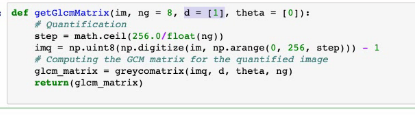

In [176]:
def calcGLCM(im,ng=256,d=[1],theta=[0, np.pi/4, np.pi/2, 3*np.pi/4]):    
    img=img_as_ubyte(im)    
    glcm_matrix = greycomatrix(img, d, theta,levels=ng, normed=True)
    return (glcm_matrix)

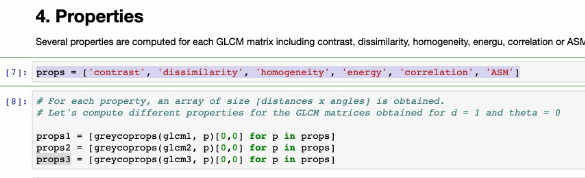

In [145]:
props = ['contrast','dissimilarity','energy','correlation']

In [181]:
def calcProps(img):
    restul_img = calcGLCM(img)
    props_img = [greycoprops(restul_img, p) for p in props]
    display(props_img)

In [187]:
calcProps(img_bloque)
calcProps(img_metal)
calcProps(img_waves)
calcProps(img_marmol)

[array([[296.77600873, 850.50272665, 684.36666792, 690.8149663 ]]),
 array([[13.3024315 , 20.92914489, 18.25684068, 18.51230781]]),
 array([[0.01666098, 0.01498693, 0.01572564, 0.01548682]]),
 array([[0.86175222, 0.58382731, 0.66597619, 0.6623562 ]])]

[array([[230.52044978, 870.69669428, 826.81284299, 885.07884645]]),
 array([[11.33150372, 20.8665823 , 20.68608994, 21.24022089]]),
 array([[0.01904642, 0.01606874, 0.0161686 , 0.01602896]]),
 array([[0.83655526, 0.32720162, 0.36211411, 0.31610932]])]

[array([[225.30001906, 675.16559288, 485.00362043, 670.17456665]]),
 array([[11.7977511 , 19.66835404, 15.8855564 , 19.53267372]]),
 array([[0.01510122, 0.01229098, 0.01333242, 0.01229301]]),
 array([[0.90431071, 0.70741348, 0.79031333, 0.70957351]])]

[array([[329.91836887, 975.02228245, 713.36772408, 828.05698585]]),
 array([[12.69300412, 18.2984041 , 13.74779291, 15.88565191]]),
 array([[0.02183068, 0.01995563, 0.02235411, 0.02106582]]),
 array([[0.81483711, 0.29429573, 0.48533667, 0.40101772]])]